In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

C:\Users\User\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('data.txt', delimiter=r"\s+", header=None)
df = df.T
df.shape

(500, 3)

In [3]:
df.columns = ['x1', 'x2', 'classes']
df

,x1,x2,classes
0,-0.7470,0.630,5.0
1,-0.1530,-0.845,4.0
2,0.2270,-0.534,3.0
3,0.0776,-0.969,3.0
4,-0.8690,0.107,5.0
...,...,...,...
495,0.5380,-0.272,2.0
496,-1.3200,0.119,4.0
497,0.6410,0.489,1.0
498,-0.6240,0.361,1.0


In [4]:
class_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5']

In [5]:
input_data = df[['x1', 'x2']].values
output_data = df[['classes']].values

In [6]:
input_data.shape

(500, 2)

In [7]:
output_data.shape

(500, 1)

In [8]:
for i in range(500):
    output_data[i,0]= int(output_data[i,0])
output_data.flatten()

array([5., 4., 3., 3., 5., 3., 2., 3., 2., 5., 3., 2., 2., 3., 2., 1., 4.,
       2., 3., 5., 3., 2., 2., 5., 1., 3., 1., 3., 4., 3., 1., 2., 4., 2.,
       5., 5., 5., 4., 2., 5., 3., 4., 5., 1., 4., 4., 1., 5., 1., 4., 2.,
       3., 3., 1., 3., 1., 3., 4., 5., 3., 2., 2., 1., 2., 3., 2., 4., 2.,
       3., 5., 4., 2., 4., 5., 5., 1., 5., 4., 4., 5., 2., 5., 3., 3., 5.,
       3., 4., 4., 5., 3., 1., 5., 5., 4., 3., 2., 3., 2., 4., 2., 4., 2.,
       3., 3., 5., 5., 1., 5., 1., 1., 1., 4., 4., 5., 1., 2., 4., 1., 3.,
       1., 2., 2., 2., 5., 4., 2., 5., 4., 3., 1., 2., 2., 2., 4., 1., 5.,
       5., 5., 1., 3., 1., 1., 4., 3., 4., 1., 1., 1., 3., 1., 2., 5., 5.,
       2., 5., 1., 4., 1., 1., 3., 2., 1., 3., 5., 3., 3., 5., 5., 4., 2.,
       3., 3., 5., 4., 3., 2., 1., 1., 4., 2., 1., 4., 1., 2., 2., 4., 4.,
       3., 4., 5., 2., 3., 3., 4., 2., 2., 5., 1., 5., 2., 2., 4., 5., 2.,
       3., 5., 5., 1., 2., 1., 2., 5., 5., 5., 5., 4., 2., 5., 1., 3., 3.,
       2., 3., 1., 2., 4.

In [9]:
e = LabelEncoder()
e.fit(output_data)
label = e.transform(output_data)
output_data_encoded = tf.keras.utils.to_categorical(output_data)
output_data_encoded.shape

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(500, 6)

In [10]:
output_data_fix = np.zeros([500,5])
for i in range (500):
    for p in range (5):
        output_data_fix[i,p]=output_data_encoded[i,p+1]
output_data_fix

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [11]:
print(input_data.shape)
print(output_data_fix.shape)

(500, 2)
(500, 5)


In [12]:
input_train = input_data[:400]
output_train = output_data_fix[:400]
input_test = input_data[400:]
output_test = output_data_fix[400:]

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',input_shape=input_data[0].shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 17,541
Trainable params: 17,541
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
r = model.fit(input_train, output_train, epochs=1000)

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 1.4899 - accuracy: 0.5775
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.2382 - accuracy: 0.7325
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9947 - accuracy: 0.7500
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7697 - accuracy: 0.7800
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.8075
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.8075
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.8150
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.8100
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.8175
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8150

13/13 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9000
Epoch 163/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9100
Epoch 164/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9150
Epoch 165/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9025
Epoch 166/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9050
Epoch 167/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9050
Epoch 168/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9000
Epoch 169/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9100
Epoch 170/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9050
Epoch 171/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9250
Epoch 323/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1852 - accuracy: 0.9200
Epoch 324/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1852 - accuracy: 0.9200
Epoch 325/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9250
Epoch 326/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9125
Epoch 327/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9225
Epoch 328/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9250
Epoch 329/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9175
Epoch 330/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9225
Epoch 331/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9250
Epoch 483/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9225
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9250
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9275
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9250
Epoch 487/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9275
Epoch 488/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9175
Epoch 489/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.9250
Epoch 490/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9225
Epoch 491/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1537 - accuracy: 0.9350
Epoch 643/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9200
Epoch 644/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9300
Epoch 645/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9325
Epoch 646/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9300
Epoch 647/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9275
Epoch 648/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9300
Epoch 649/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9300
Epoch 650/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9275
Epoch 651/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9375
Epoch 803/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9325
Epoch 804/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9300
Epoch 805/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9325
Epoch 806/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9375
Epoch 807/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9275
Epoch 808/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9325
Epoch 809/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9225
Epoch 810/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.9250
Epoch 811/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9325
Epoch 963/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9375
Epoch 964/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 0.9350
Epoch 965/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9350
Epoch 966/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9400
Epoch 967/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9300
Epoch 968/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.9450
Epoch 969/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9300
Epoch 970/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9375
Epoch 971/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.

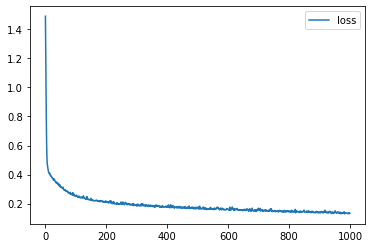

In [16]:
plt.plot(r.history['loss'],label = 'loss')
plt.legend()
plt.show()

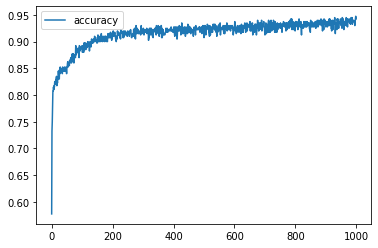

In [17]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.legend()
plt.show()

In [18]:
model.evaluate(input_test, output_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8800


[0.24722862243652344, 0.8799999952316284]

In [19]:
test = model.predict(input_data)
print(test)

[[2.54709939e-05 6.95972496e-17 2.15685578e-22 1.50186692e-15
  9.99974489e-01]
 [1.78923674e-25 6.95921158e-16 6.68819295e-03 9.93311882e-01
  8.09416356e-09]
 [1.08653087e-11 5.44819522e-05 9.99936223e-01 9.27138171e-06
  3.52930551e-09]
 ...
 [1.00000000e+00 1.22930589e-11 4.03761367e-28 9.92570427e-30
  1.49566488e-11]
 [3.93745095e-01 2.52284131e-11 3.26743806e-20 5.00206343e-12
  6.06254876e-01]
 [5.21367967e-01 1.18615816e-07 2.91312513e-19 2.55876960e-12
  4.78631943e-01]]


In [20]:
for p in range(500):
    haha = test[p,0]+test[p,1]+test[p,2]+test[p,3]+test[p,4]
    print(haha)

0.99999994
1.0000001
1.0
1.0000001
0.99999994
1.0
1.0
1.0
0.99999994
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000001
1.0
1.0
0.99999994
1.0
1.0000001
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
0.99999994
1.0000001
1.0
1.0
0.99999994
1.0
1.0000001
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
0.99999994
0.99999994
0.99999994
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0
0.99999994
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
0.99999994
1.0
1.0
0.99999994
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0000001
1.0
0.99999994
0.99999994
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0000001
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
0.99999994
1.0
0.99999994
1.0
1.0
0.99999994
1.0
0.99999994
1.0
1.0
1.0
0.99999994
0.999999

In [21]:
test.shape

(500, 5)

In [22]:
def get_label(predictions):
    hehe = np.argmax(predictions)
    label = hehe+1
    return label

In [23]:
for i in range(500):
    print(get_label(test[i]))

5
4
3
3
5
3
2
2
2
5
3
2
2
2
2
1
4
2
3
5
3
2
2
5
1
2
1
2
4
2
1
2
4
2
5
5
5
4
2
5
3
4
1
1
4
4
1
5
1
4
2
3
3
1
3
1
3
4
4
3
2
2
1
2
3
2
4
2
3
5
4
2
3
5
5
1
5
4
4
5
3
5
3
2
5
3
4
4
5
3
2
5
5
4
3
2
3
2
4
2
4
2
2
3
5
5
1
5
1
1
1
4
4
5
1
2
4
1
3
1
2
2
2
5
4
2
5
4
3
1
2
2
2
4
1
5
5
5
1
3
1
1
4
3
4
5
2
1
3
1
2
5
5
2
5
1
4
1
2
3
2
1
3
5
3
3
5
5
4
2
3
3
5
4
3
2
1
1
4
2
5
4
1
2
2
4
4
3
4
5
2
3
3
4
2
2
5
5
5
2
2
4
5
2
3
5
5
1
2
1
2
5
5
5
5
4
2
5
1
2
3
2
3
1
2
4
4
2
4
1
1
2
1
1
4
1
1
5
1
4
1
2
2
1
2
2
4
5
5
2
4
2
5
2
4
5
2
2
5
4
4
4
1
3
5
4
1
3
4
4
5
2
4
4
3
5
1
3
2
2
5
2
2
5
1
2
3
1
4
1
5
1
2
3
2
1
4
5
3
1
3
3
3
4
5
1
5
3
1
2
5
3
2
3
1
1
5
2
3
3
5
2
4
1
4
1
1
4
3
2
2
3
4
2
4
5
1
3
3
2
5
5
4
1
2
4
3
4
3
1
2
1
4
2
3
1
3
4
3
5
3
2
2
3
5
3
1
4
2
1
5
2
1
5
4
3
4
1
5
1
2
2
2
5
4
2
5
5
3
3
3
1
2
5
4
1
5
4
2
2
4
1
3
2
5
1
2
1
1
2
1
5
3
3
1
2
5
4
4
4
5
3
1
5
3
5
1
2
2
3
4
2
4
1
2
2
2
1
4
4
4
5
3
3
5
1
1
4
3
1
1
4
2
5
4
5
1
2
3
5
1
4
4
4
4
4
2
4
5
4
4
4
4
4
3
1
5
1
1
1
4
2
5
3
5
2
1
2
4
1
5
1
2
4
2
2
4
1
5
1


In [24]:
x1grid = np.arange(-1.7, 1.4, 0.01)
x2grid = np.arange(-1.7, 1.4, 0.01)

In [25]:
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# make predictions for the grid
yhat = model.predict(grid)

In [26]:
yhat.shape

(96100, 5)

In [27]:
y_label = np.zeros(96100)
for i in range(96100):
    y_label[i] = get_label(yhat[i])

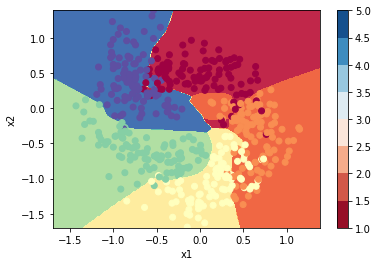

In [28]:
# reshape the predictions back into a grid
zz = y_label.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu')
plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral)
plt.colorbar(c)
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(input_data[:, 0], input_data[:, 1], c=output_data, cmap=plt.cm.Spectral)